<a href="https://colab.research.google.com/github/IvanHernandez26/Trabajo-Analisis-de-Datos/blob/main/JUEVEZS_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HERNANDEZ BLANCO DEIGO IVAN,
MUÑIZ HERNANDEZ ALEXIS,
GARCIA LOPEZ BRAYAN ALESSANDRO

In [13]:
#setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data = pd.read_csv("datasets/vgsales.csv", index_col = 0)
data.shape

(16598, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
# eliminar columnas del mayor de 3% en nulos
null_counts = data.isnull().sum()
null_counts

,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
columns_to_drop = null_counts.loc[null_counts > (0.03 * len(data))].index
data_cleaned = data.drop(columns = columns_to_drop)
data_cleaned.head()
data_cleaned.shape

(16598, 10)

In [ ]:
#remplazar los nulos en variables numericas con la mediana
numeric_columns = data_cleaned.select_dtypes(include = ['float64','int64']).columns

for column in numeric_columns:
    data_cleaned[column].fillna(data_cleaned[column].median(), inplace = True)

data_cleaned.isnull().sum()

/tmp/ipython-input-4263628121.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(data_cleaned[column].median(), inplace = True)


,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
#cambiar las columnas categoricas
string_columns = data_cleaned.select_dtypes(include = ['object']).columns
for col in string_columns:
  data_cleaned[col].fillna(data_cleaned[col].mode()[0.], inplace = True)

data_cleaned.isnull().sum()

/tmp/ipython-input-2657672425.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].mode()[0.], inplace = True)


,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
#convertir en int64 algunas columnas a float64
float_columns = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in float_columns:
  data_cleaned[col] = data_cleaned[col].astype('int64')

data_cleaned.dtypes

,0
Name,object
Platform,object
Year,int64
Genre,object
Publisher,object
NA_Sales,int64
EU_Sales,int64
JP_Sales,int64
Other_Sales,int64
Global_Sales,int64


In [ ]:
descriptive_stats = data_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()
descriptive_stats

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.106218,0.050428,0.024461,0.007350,0.294011
std,0.752163,0.446498,0.250813,0.146684,1.502528
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,29.000000,10.000000,10.000000,82.000000


In [ ]:
#filtrar juegos estrenados > despues del 2010
videojuegos_estreno = data_cleaned.loc[data_cleaned['Year'] > 2010]
videojuegos_estreno.shape

(3886, 10)

/tmp/ipython-input-1373348046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')


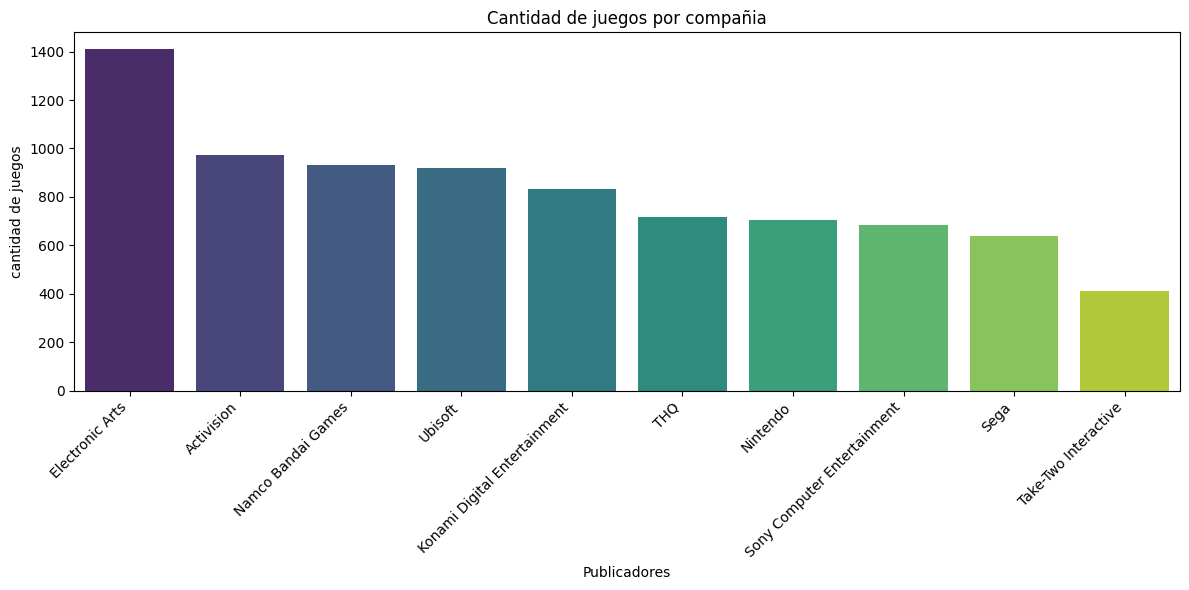

In [ ]:
top_publishers = data_cleaned['Publisher'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title('Cantidad de juegos por compañia')
plt.xlabel('Publicadores')
plt.ylabel('cantidad de juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()